In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from energy_forecast.Dataloader import Dataloader
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
Loader = Dataloader()
data = Loader.load_csv()
data.head()

/home/sambegou/projet_bg/src/energy_forecast/Dataloader.py:65: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filename, delimiter=",")


,nom_methode_dpe,version_methode_dpe,date_etablissement_dpe,consommation_energie,classe_consommation_energie,estimation_ges,classe_estimation_ges,annee_construction,surface_thermique_lot,latitude,longitude,tr001_modele_dpe_type_libelle,tr002_type_batiment_description,code_insee_commune_actualise,tv016_departement_code,geo_adresse,geo_score
0,3CL,"3CL-DPE, version 1.3",2013-04-12,132.0,C,29.0,D,5200,190.0,46.040911,5.317098,Vente,Maison Individuelle,1430.0,1,3 Impasse du Foyer Rural 01160 Varambon,0.4
1,Méthode Facture,NaN,2013-04-20,0.0,N,0.0,N,1947,42.0,NaN,NaN,Vente,Maison Individuelle,83590.0,2,NaN,0.0
2,Méthode 3CL,"3CL-DPE, version 1.3",2013-04-16,326.0,E,18.0,C,2006,107.0,NaN,NaN,Vente,Maison Individuelle,3360.0,3,NaN,0.0
3,Méthode 3CL,"3CL-DPE, version 1.3",2013-05-06,326.0,E,14.0,C,1948,90.0,NaN,NaN,Vente,Logement,4320.0,4,NaN,0.0
4,Méthode 3CL,"3CL-DPE, version 1.3",2013-04-27,221.0,D,3.0,A,2006,78.2,44.773510,6.954523,Location,Logement,5120.0,5,Rue de la Bluette 05460 Abriès-Ristolas,0.4


In [3]:
data.shape

(100008, 17)

In [4]:
data.head()

,nom_methode_dpe,version_methode_dpe,date_etablissement_dpe,consommation_energie,classe_consommation_energie,estimation_ges,classe_estimation_ges,annee_construction,surface_thermique_lot,latitude,longitude,tr001_modele_dpe_type_libelle,tr002_type_batiment_description,code_insee_commune_actualise,tv016_departement_code,geo_adresse,geo_score
0,3CL,"3CL-DPE, version 1.3",2013-04-12,132.0,C,29.0,D,5200,190.0,46.040911,5.317098,Vente,Maison Individuelle,1430.0,1,3 Impasse du Foyer Rural 01160 Varambon,0.4
1,Méthode Facture,NaN,2013-04-20,0.0,N,0.0,N,1947,42.0,NaN,NaN,Vente,Maison Individuelle,83590.0,2,NaN,0.0
2,Méthode 3CL,"3CL-DPE, version 1.3",2013-04-16,326.0,E,18.0,C,2006,107.0,NaN,NaN,Vente,Maison Individuelle,3360.0,3,NaN,0.0
3,Méthode 3CL,"3CL-DPE, version 1.3",2013-05-06,326.0,E,14.0,C,1948,90.0,NaN,NaN,Vente,Logement,4320.0,4,NaN,0.0
4,Méthode 3CL,"3CL-DPE, version 1.3",2013-04-27,221.0,D,3.0,A,2006,78.2,44.773510,6.954523,Location,Logement,5120.0,5,Rue de la Bluette 05460 Abriès-Ristolas,0.4


In [5]:
table_schema = pd.read_json("dpe-france-tableschema.json").transpose()
columns_names = table_schema.values[0]
title = []
for i in range(len(columns_names)):
    try:
        title.append(columns_names[i]['title'])
    except:
        title.append(columns_names[i]['name'])

In [6]:
title

['Nom de la méthode DPE utilisée',
 'Version de la méthode DPE utilisée',
 'Date DPE',
 'Consommation énergie en kWhEP/m².an',
 "Classement consommation d'énergie",
 'Estimation GES en Kg eqCO2/m².an',
 'Classement GES',
 'Année de construction ou évaluation de cette date',
 "Surface thermique du lot pour un bâtiment à usage principal autre qu'habitation",
 'Latitude du Bâtiment',
 'Longitude du Bâtiment',
 'Type de DPE',
 'Type de bâtiment',
 'Code INSEE Commune',
 'Code département',
 'geo_adresse',
 'geo_score']

In [7]:
columns_drop = ["nom_methode_dpe", "version_methode_dpe", "date_etablissement_dpe", 
                "geo_adresse", "geo_score", "consommation_energie", "estimation_ges", 
                "latitude", "longitude", "tv016_departement_code",]

In [8]:
data.drop(columns=columns_drop, inplace=True)

In [9]:
data.head()

,classe_consommation_energie,classe_estimation_ges,annee_construction,surface_thermique_lot,tr001_modele_dpe_type_libelle,tr002_type_batiment_description,code_insee_commune_actualise
0,C,D,5200,190.0,Vente,Maison Individuelle,1430.0
1,N,N,1947,42.0,Vente,Maison Individuelle,83590.0
2,E,C,2006,107.0,Vente,Maison Individuelle,3360.0
3,E,C,1948,90.0,Vente,Logement,4320.0
4,D,A,2006,78.2,Location,Logement,5120.0


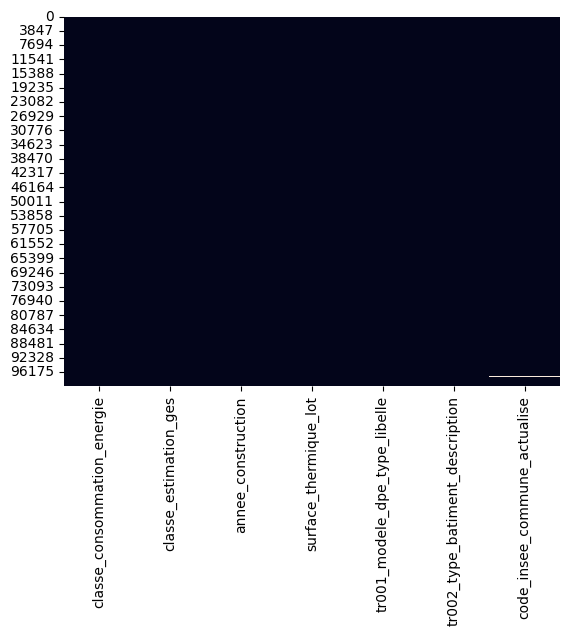

In [10]:
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [11]:
data.isnull().sum()

classe_consommation_energie          0
classe_estimation_ges                0
annee_construction                   0
surface_thermique_lot                2
tr001_modele_dpe_type_libelle        0
tr002_type_batiment_description      0
code_insee_commune_actualise       167
dtype: int64

In [12]:
import re
data["code_insee_commune_actualise"] = data["code_insee_commune_actualise"].\
    apply(lambda x: float(re.sub('[^0-9]', '', str(x))) if re.sub('[^0-9]', '', str(x)) else 0)

In [13]:
data["code_insee_commune_actualise"].value_counts()

10387.0    2275
63000.0    1730
4112.0     1412
6088.0     1261
5018.0     1107
           ... 
1175.0        1
9050.0        1
9212.0        1
4169.0        1
30230.0       1
Name: code_insee_commune_actualise, Length: 5121, dtype: int64

In [15]:
data.isnull().sum()

classe_consommation_energie        0
classe_estimation_ges              0
annee_construction                 0
surface_thermique_lot              2
tr001_modele_dpe_type_libelle      0
tr002_type_batiment_description    0
code_insee_commune_actualise       0
dtype: int64

In [16]:
data["surface_thermique_lot"].fillna(0, inplace=True)

In [17]:
data.isnull().sum()

classe_consommation_energie        0
classe_estimation_ges              0
annee_construction                 0
surface_thermique_lot              0
tr001_modele_dpe_type_libelle      0
tr002_type_batiment_description    0
code_insee_commune_actualise       0
dtype: int64

In [21]:
data.duplicated().sum()

12765

In [22]:
data.drop_duplicates(inplace=True)

In [23]:
data.duplicated().sum()

0

In [24]:
df = data.reindex(sorted(data.columns), axis=1)

In [25]:
df.head()

,annee_construction,classe_consommation_energie,classe_estimation_ges,code_insee_commune_actualise,surface_thermique_lot,tr001_modele_dpe_type_libelle,tr002_type_batiment_description
0,5200,C,D,14300.0,190.0,Vente,Maison Individuelle
1,1947,N,N,835900.0,42.0,Vente,Maison Individuelle
2,2006,E,C,33600.0,107.0,Vente,Maison Individuelle
3,1948,E,C,43200.0,90.0,Vente,Logement
4,2006,D,A,51200.0,78.2,Location,Logement


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [27]:
#train test split
X = pd.get_dummies(df.drop(columns=["classe_consommation_energie", "classe_estimation_ges"], axis=1))
y1 = df["classe_consommation_energie"]
y2 = df["classe_estimation_ges"]
lr = LogisticRegression()
xg = XGBClassifier()
rf = RandomForestClassifier()
scaler = StandardScaler()
encoder = LabelEncoder()
X.head()

,annee_construction,code_insee_commune_actualise,surface_thermique_lot,tr001_modele_dpe_type_libelle_Bâtiment public,tr001_modele_dpe_type_libelle_Copropriété,tr001_modele_dpe_type_libelle_Location,tr001_modele_dpe_type_libelle_Neuf,tr001_modele_dpe_type_libelle_Vente,tr002_type_batiment_description_Bâtiment collectif à usage principal d'habitation,tr002_type_batiment_description_Logement,tr002_type_batiment_description_Maison Individuelle
0,5200,14300.0,190.0,0,0,0,0,1,0,0,1
1,1947,835900.0,42.0,0,0,0,0,1,0,0,1
2,2006,33600.0,107.0,0,0,0,0,1,0,0,1
3,1948,43200.0,90.0,0,0,0,0,1,0,1,0
4,2006,51200.0,78.2,0,0,1,0,0,0,1,0


In [28]:
def train_test(X, y, models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    results = pd.DataFrame()
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        model_name = model.__class__.__name__
        results[model_name+" train score"] = [model.score(X_train, y_train)]
        results[model_name+" test score"] = [model.score(X_test, y_test)]
        results.index = ["score"]
    return results


In [29]:
np.unique(y1), np.unique(y2)

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N'], dtype=object))

In [30]:
encoder.fit(y1)
encoder.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N'], dtype=object)

In [31]:
encoder.transform(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N'])

array([0, 1, 2, 3, 4, 5, 6, 7])

In [32]:
y = encoder.transform(y1)

In [33]:
train_test(X, y, [xg, lr, rf])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,XGBClassifier train score,XGBClassifier test score,LogisticRegression train score,LogisticRegression test score,RandomForestClassifier train score,RandomForestClassifier test score
score,0.542001,0.457876,0.033388,0.035113,0.98315,0.403622


In [34]:
import pickle
pickle.dump(encoder, open("encoder.pkl", "wb"))

In [38]:
pickle.dump(xg, open("model.pkl", "wb"))

In [52]:
X.columns

Index(['annee_construction', 'code_insee_commune_actualise',
       'surface_thermique_lot',
       'tr001_modele_dpe_type_libelle_Bâtiment public',
       'tr001_modele_dpe_type_libelle_Copropriété',
       'tr001_modele_dpe_type_libelle_Location',
       'tr001_modele_dpe_type_libelle_Neuf',
       'tr001_modele_dpe_type_libelle_Vente',
       'tr002_type_batiment_description_Bâtiment collectif à usage principal d'habitation',
       'tr002_type_batiment_description_Logement',
       'tr002_type_batiment_description_Maison Individuelle'],
      dtype='object')

In [56]:
d = {
  "annee_construction": 2010,
  "surface_thermique_lot": 0,
  "code_insee_commune_actualise": 0,
  "batiment_public": 0,
  "copropriete": 0,
  "location": 0,
  "neuf": 0,
  "vente": 0,
  "batiment_collectif": 0,
  "logement": 0,
  "maison_individuelle": 0
}
np.array(list(d.values()))

array([2010,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

In [57]:
data = np.array(list(d.values()))
columns = ['annee_construction', 'code_insee_commune_actualise','surface_thermique_lot',
                   'tr001_modele_dpe_type_libelle_Bâtiment public','tr001_modele_dpe_type_libelle_Copropriété',
                   'tr001_modele_dpe_type_libelle_Location','tr001_modele_dpe_type_libelle_Neuf',
       'tr001_modele_dpe_type_libelle_Vente',
       "tr002_type_batiment_description_Bâtiment collectif à usage principal d'habitation",
       'tr002_type_batiment_description_Logement',
       'tr002_type_batiment_description_Maison Individuelle'
       ]
data = pd.DataFrame(data.reshape(1,-1), columns=columns)
data

,annee_construction,code_insee_commune_actualise,surface_thermique_lot,tr001_modele_dpe_type_libelle_Bâtiment public,tr001_modele_dpe_type_libelle_Copropriété,tr001_modele_dpe_type_libelle_Location,tr001_modele_dpe_type_libelle_Neuf,tr001_modele_dpe_type_libelle_Vente,tr002_type_batiment_description_Bâtiment collectif à usage principal d'habitation,tr002_type_batiment_description_Logement,tr002_type_batiment_description_Maison Individuelle
0,2010,0,0,0,0,0,0,0,0,0,0
